#### Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
import seaborn as sns

#### Importing the Datasets

In [2]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')
users = pd.read_csv('takehome_users.csv', encoding = 'latin-1')

In [3]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


#### Convert time_stamp column to type datetime

In [5]:
#
engagement_df['date_time'] = pd.to_datetime(engagement_df['time_stamp'])

#### Extract just the dates and dropping the timestamps


In [6]:
engagement_df['date'] = engagement_df['date_time'].dt.date

#### Number of Unique users

In [7]:
print('# Of Users: {}:'.format(len(engagement_df['user_id'].unique())))

# Of Users: 8823:


#### Filetering users who have logged in atleast three times

In [8]:
#Key - user ID
#Value - flag(which identifies if the user logged in >= 3 times)

boolean = pd.Series.to_dict(engagement_df.groupby('user_id').count().date >= 3)

In [9]:
engagement = engagement_df.copy()
engagement['keep_user'] = engagement.user_id.map(boolean)
engagement.head(10)

,time_stamp,user_id,visited,date_time,date,keep_user
0,2014-04-22 03:53:30,1,1,2014-04-22 03:53:30,2014-04-22,False
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True


In [10]:
engagement = engagement[engagement.keep_user == True]

#### Number of Unique users with atleast 3 login days

In [11]:
print('Number of users with at least 3 login days: {}'.format(len(engagement.groupby('user_id').count())))

Number of users with at least 3 login days: 2248


#### Below two functions will create a True Flag if there are three consecutive logins in a 7 day period else it will return False

In [12]:
def valid_login(x):    
    length = len(x)
    idx = 0
    while idx < (length - 2):
        if (x[idx + 2] - x[idx]).days > 7:
            idx += 1
            continue            
        else:
            return True  
    return False

In [13]:
def check_criteria(users, grouped):
    bool_dict = {}
    dates = [list(grouped.get_group(x)) for x in users]
    for pos,userids in enumerate(users):
        bool_dict[userids] = valid_login(dates[pos])
    return bool_dict

In [14]:
# Create a list of all the user ID's
user_ids = engagement['user_id'].unique()
grouped = engagement.groupby('user_id')['date_time']

bool_dict = check_criteria(user_ids, grouped)

In [15]:
engagement.drop("keep_user", axis = 1, inplace=True)

In [16]:
engagement['keep_user'] = engagement['user_id'].map(bool_dict)

In [17]:
engagement.head(20)

,time_stamp,user_id,visited,date_time,date,keep_user
1,2013-11-15 03:45:04,2,1,2013-11-15 03:45:04,2013-11-15,True
2,2013-11-29 03:45:04,2,1,2013-11-29 03:45:04,2013-11-29,True
3,2013-12-09 03:45:04,2,1,2013-12-09 03:45:04,2013-12-09,True
4,2013-12-25 03:45:04,2,1,2013-12-25 03:45:04,2013-12-25,True
5,2013-12-31 03:45:04,2,1,2013-12-31 03:45:04,2013-12-31,True
6,2014-01-08 03:45:04,2,1,2014-01-08 03:45:04,2014-01-08,True
7,2014-02-03 03:45:04,2,1,2014-02-03 03:45:04,2014-02-03,True
8,2014-02-08 03:45:04,2,1,2014-02-08 03:45:04,2014-02-08,True
9,2014-02-09 03:45:04,2,1,2014-02-09 03:45:04,2014-02-09,True
10,2014-02-13 03:45:04,2,1,2014-02-13 03:45:04,2014-02-13,True


In [18]:
engagement = engagement[engagement['keep_user'] == True]

In [19]:
print('Number of "Adopted Users": {}'.format(len(engagement.user_id.unique())))

Number of "Adopted Users": 1656


In [20]:
# Create a list of all adopted user id's
adopted_users = engagement.user_id.unique()

In [21]:
users.head(3).transpose()

,0,1,2
object_id,1,2,3
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52
name,Clausen August,Poole Matthew,Bottrill Mitchell
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE
last_session_creation_time,1.39814e+09,1.39624e+09,1.36373e+09
opted_in_to_mailing_list,1,0,0
enabled_for_marketing_drip,0,0,0
org_id,11,1,94
invited_by_user_id,10803,316,1525


In [22]:
def keep_user(x, users):
    if x in users:
        return 1
    else:
        return 0

In [23]:
# Mark those users who were adopted in the overall dataframes
users['adopted_user'] = users['object_id'].apply(lambda x: keep_user(x, adopted_users))

In [24]:
users.head(3).transpose()

,0,1,2
object_id,1,2,3
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52
name,Clausen August,Poole Matthew,Bottrill Mitchell
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE
last_session_creation_time,1.39814e+09,1.39624e+09,1.36373e+09
opted_in_to_mailing_list,1,0,0
enabled_for_marketing_drip,0,0,0
org_id,11,1,94
invited_by_user_id,10803,316,1525


In [25]:
engagement_df['adopted_user'] = engagement_df['user_id'].apply(lambda x: keep_user(x, adopted_users))

In [26]:
#adopted users login statistics
min_login_adopted = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().min()
max_login_adopted = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().max()
avg_login_adopted = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().mean()

In [27]:
print(' Login average for adopted users is ',avg_login_adopted, '\n',
      'Maximum number of logins for an adopted user is ',max_login_adopted, '\n',
      'Minimum number of logins for an adopted user is ',min_login_adopted)

 Login average for adopted users is  119.7626811594203 
 Maximum number of logins for an adopted user is  606 
 Minimum number of logins for an adopted user is  3


In [28]:
y = engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)
x = range(len(engagement_df[engagement_df.adopted_user == True].groupby('user_id')['date'].count().sort_values(ascending = False)))

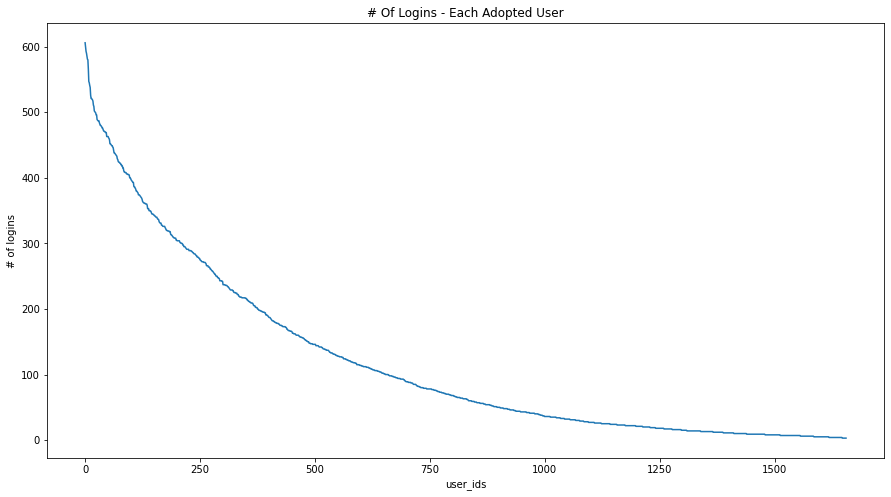

In [29]:
fig = plt.figure(figsize = (15,8))
plt.plot(x,y)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins - Each Adopted User')
plt.show()

In [30]:
#unadopted users login statistics
min_login_unadopted = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().min()
max_login_unadopted = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().max()
avg_login_unadopted = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().mean()

In [31]:
print(' Login average for adopted users is ',avg_login_unadopted, '\n',
      'Maximum number of logins for an adopted user is ',max_login_unadopted, '\n',
      'Minimum number of logins for an adopted user is ',min_login_unadopted)

 Login average for adopted users is  1.3380772987302916 
 Maximum number of logins for an adopted user is  15 
 Minimum number of logins for an adopted user is  1


In [32]:
yu = engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)
xu = range(len(engagement_df[engagement_df.adopted_user == False].groupby('user_id')['date'].count().sort_values(ascending = False)))

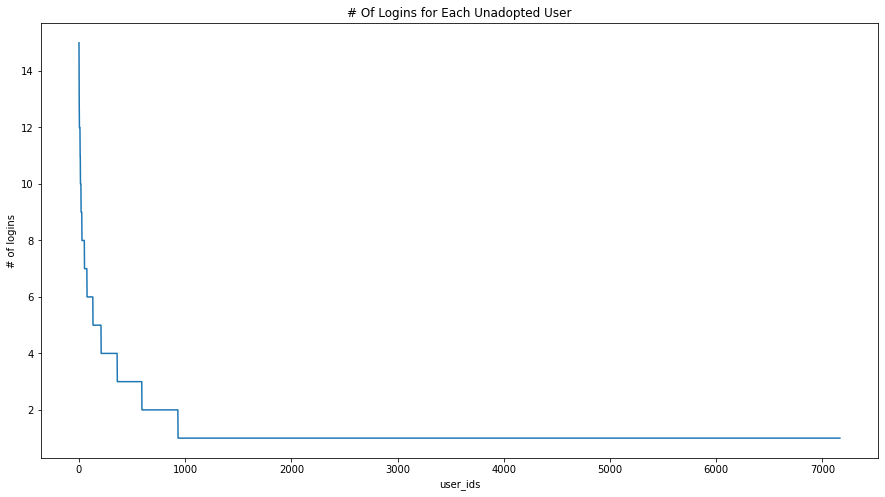

In [33]:
plt.figure(figsize = (15,8))
plt.plot(xu,yu)
plt.xlabel('user_ids')
plt.ylabel('# of logins')
plt.title('# Of Logins for Each Unadopted User')
plt.show()

> **It is clear that the greatest predictor of future adoption is the number of logins. Adopted users login  more times than the unadopted**

In [34]:
users.groupby(['opted_in_to_mailing_list','adopted_user'])['object_id'].count() / len(users)

opted_in_to_mailing_list  adopted_user
0                         0               0.64825
                          1               0.10225
1                         0               0.21375
                          1               0.03575
Name: object_id, dtype: float64

> **Percentage of adopted vs unadopted users with respect to opting into the mailing list**

In [35]:
users.groupby(['creation_source','adopted_user'])['object_id'].count() / len(users)


creation_source     adopted_user
GUEST_INVITE        0               0.149500
                    1               0.030750
ORG_INVITE          0               0.306667
                    1               0.047833
PERSONAL_PROJECTS   0               0.161583
                    1               0.014333
SIGNUP              0               0.148750
                    1               0.025167
SIGNUP_GOOGLE_AUTH  0               0.095500
                    1               0.019917
Name: object_id, dtype: float64

> **Percentage of adopted vs unadopted users with respect to their creation source**

In [36]:
users.groupby(['enabled_for_marketing_drip','adopted_user'])['object_id'].count() / len(users)


enabled_for_marketing_drip  adopted_user
0                           0               0.734083
                            1               0.116583
1                           0               0.127917
                            1               0.021417
Name: object_id, dtype: float64

> **Percentage of adopted vs unadopted users with respect to enabled market drip**

### Conclusion

1. Hence we can conclude that the greatest indicator of adoption is how many times a user logs in.
2. The unadopted users logged in on average **1.33** times. 
3. The adopted users had an average login of **119.76** times. 